In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re

In [2]:
fields = ['episode', 'reward', 'ep_block_prob', 'ep_accepted_requests', 'avg_deployment_cost',
        'avg_total_latency', 'avg_access_latency', 'avg_proc_latency',
        'avg_throuput_in', 'avg_packetsize_in', 'avg_interarrival_in', 
        'avg_throuput_out','avg_packetsize_out','avg_interarrival_out',
        'avg_qoe','gini', 'execution_time']

## Copare mean during training and testing

In [6]:
results_df = pd.read_csv('./balanced_results.csv')

In [10]:
df = results_df

# Analysing The Results

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Focus on columns of interest for analysis
columns_of_interest = [
    'cost_weight', 'qoe_weight', 'qoe_included',
    'train_avg_qoe', 'test_avg_qoe',
    'train_avg_deployment_cost', 'test_avg_deployment_cost',
]

In [17]:
df = df.astype({'cost_weight': 'float64', 'qoe_weight': 'float64', 'latency_weight': 'float64', 'gini_weight': 'float64'})

In [19]:
# Ensure that only the relevant columns are selected for plotting
df_subset = df[columns_of_interest]

In [29]:
results_df.columns

Index(['Unnamed: 0', 'alg', 'env_name', 'qoe_included', 'obj_included',
       'cost_weight', 'qoe_weight', 'latency_weight', 'gini_weight',
       'qoe_simulation_mode', 'qoe_accuracy', 'train_avg_qoe', 'train_gini',
       'train_avg_total_latency', 'train_avg_deployment_cost',
       'train_ep_accepted_requests', 'test_avg_qoe', 'test_gini',
       'test_avg_total_latency', 'test_avg_deployment_cost',
       'test_ep_accepted_requests'],
      dtype='object')

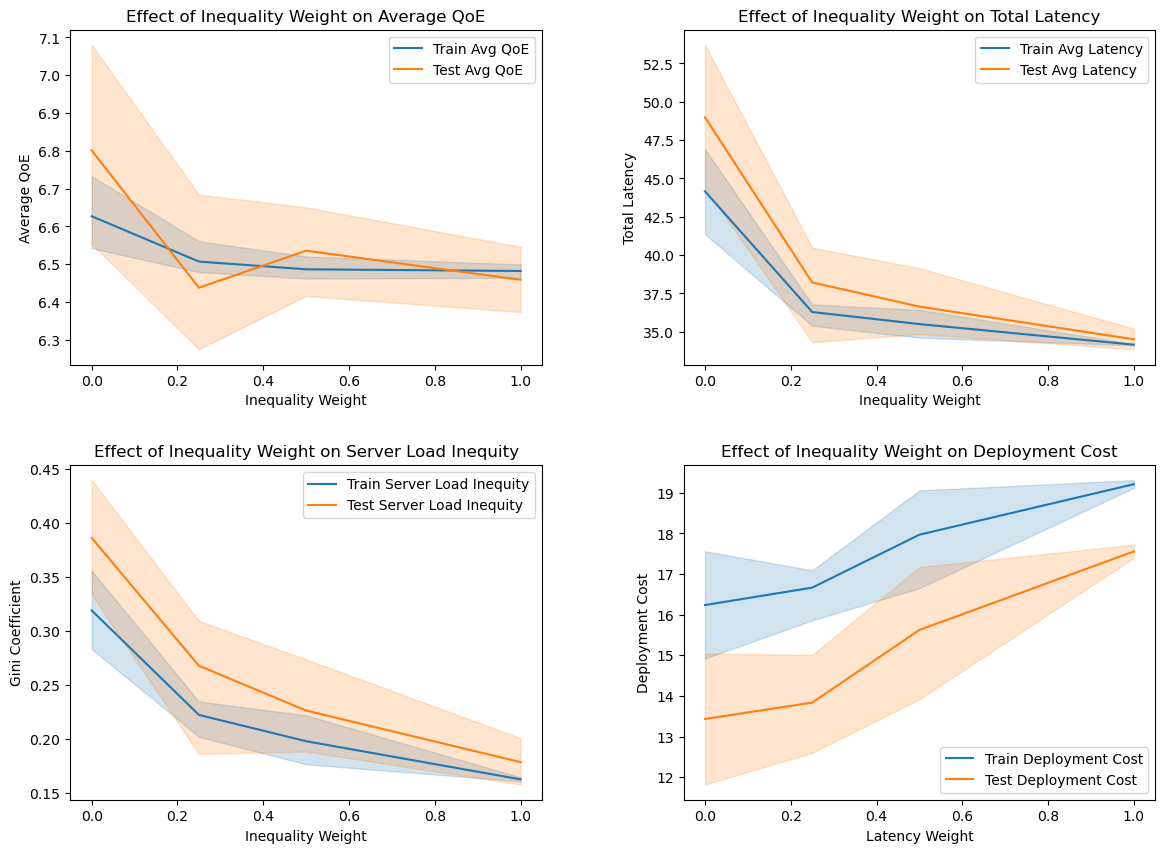

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust spacing between subplots

# Subplot 1: Train vs Test Average QoE
sns.lineplot(data=df, x='gini_weight', y='train_avg_qoe', label='Train Avg QoE', ax=axs[0, 0])
sns.lineplot(data=df, x='gini_weight', y='test_avg_qoe', label='Test Avg QoE', ax=axs[0, 0])
axs[0, 0].set_title('Effect of Inequality Weight on Average QoE')
axs[0, 0].set_xlabel('Inequality Weight')
axs[0, 0].set_ylabel('Average QoE')
axs[0, 0].legend()

# Subplot 2: Train vs Test Total Latency
sns.lineplot(data=df, x='gini_weight', y='train_avg_total_latency', label='Train Avg Latency', ax=axs[0, 1])
sns.lineplot(data=df, x='gini_weight', y='test_avg_total_latency', label='Test Avg Latency', ax=axs[0, 1])
axs[0, 1].set_title('Effect of Inequality Weight on Total Latency')
axs[0, 1].set_xlabel('Inequality Weight')
axs[0, 1].set_ylabel('Total Latency')
axs[0, 1].legend()

# Subplot 3: Train vs Test Server Load Inequity (Gini)
sns.lineplot(data=df, x='gini_weight', y='train_gini', label='Train Server Load Inequity', ax=axs[1, 0])
sns.lineplot(data=df, x='gini_weight', y='test_gini', label='Test Server Load Inequity', ax=axs[1, 0])
axs[1, 0].set_title('Effect of Inequality Weight on Server Load Inequity')
axs[1, 0].set_xlabel('Inequality Weight')
axs[1, 0].set_ylabel('Gini Coefficient')
axs[1, 0].legend()

# Subplot 4: Train vs Test Deployment Cost
sns.lineplot(data=df, x='gini_weight', y='train_avg_deployment_cost', label='Train Deployment Cost', ax=axs[1, 1])
sns.lineplot(data=df, x='gini_weight', y='test_avg_deployment_cost', label='Test Deployment Cost', ax=axs[1, 1])
axs[1, 1].set_title('Effect of Inequality Weight on Deployment Cost')
axs[1, 1].set_xlabel('Latency Weight')
axs[1, 1].set_ylabel('Deployment Cost')
axs[1, 1].legend()

# Save the combined figure
plt.savefig('combined_gini_analysis.png')

# Show the combined figure
plt.show()


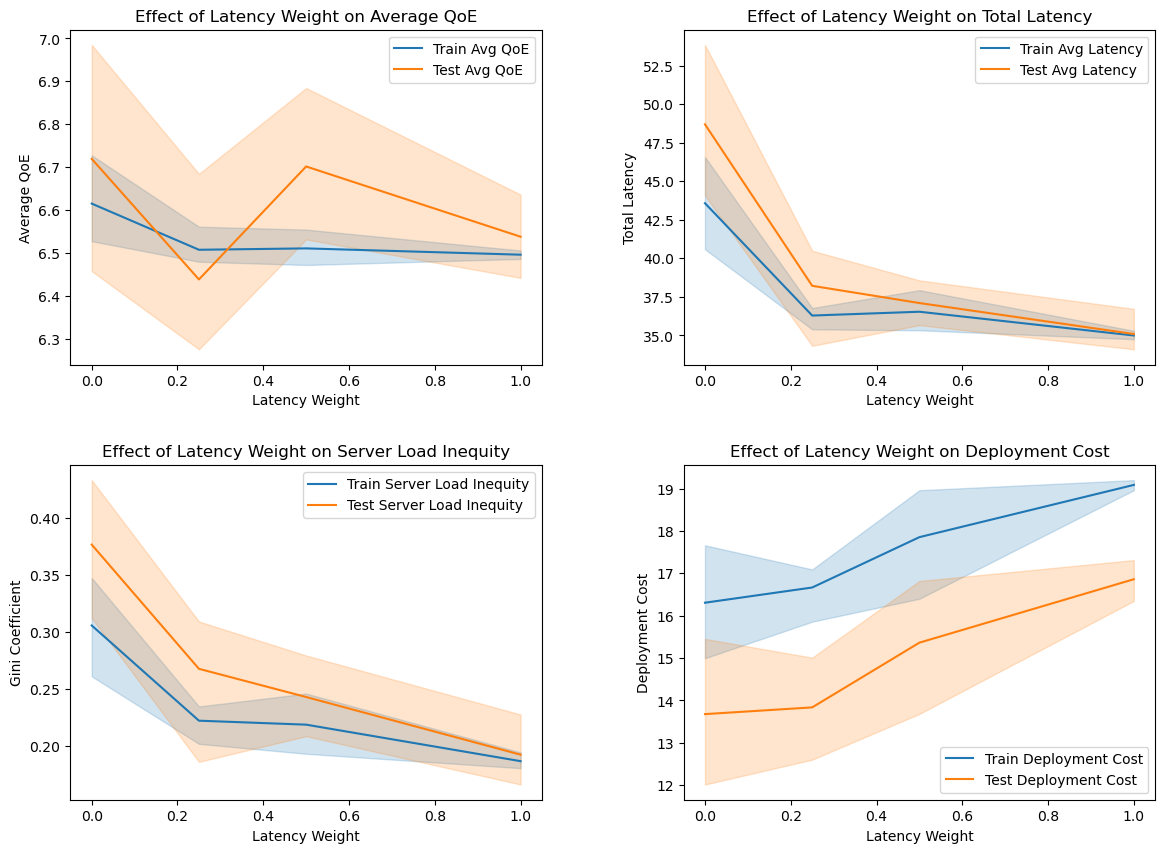

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust spacing between subplots

# Subplot 1: Train vs Test Average QoE
sns.lineplot(data=df, x='latency_weight', y='train_avg_qoe', label='Train Avg QoE', ax=axs[0, 0])
sns.lineplot(data=df, x='latency_weight', y='test_avg_qoe', label='Test Avg QoE', ax=axs[0, 0])
axs[0, 0].set_title('Effect of Latency Weight on Average QoE')
axs[0, 0].set_xlabel('Latency Weight')
axs[0, 0].set_ylabel('Average QoE')
axs[0, 0].legend()

# Subplot 2: Train vs Test Total Latency
sns.lineplot(data=df, x='latency_weight', y='train_avg_total_latency', label='Train Avg Latency', ax=axs[0, 1])
sns.lineplot(data=df, x='latency_weight', y='test_avg_total_latency', label='Test Avg Latency', ax=axs[0, 1])
axs[0, 1].set_title('Effect of Latency Weight on Total Latency')
axs[0, 1].set_xlabel('Latency Weight')
axs[0, 1].set_ylabel('Total Latency')
axs[0, 1].legend()

# Subplot 3: Train vs Test Server Load Inequity (Gini)
sns.lineplot(data=df, x='latency_weight', y='train_gini', label='Train Server Load Inequity', ax=axs[1, 0])
sns.lineplot(data=df, x='latency_weight', y='test_gini', label='Test Server Load Inequity', ax=axs[1, 0])
axs[1, 0].set_title('Effect of Latency Weight on Server Load Inequity')
axs[1, 0].set_xlabel('Latency Weight')
axs[1, 0].set_ylabel('Gini Coefficient')
axs[1, 0].legend()

# Subplot 4: Train vs Test Deployment Cost
sns.lineplot(data=df, x='latency_weight', y='train_avg_deployment_cost', label='Train Deployment Cost', ax=axs[1, 1])
sns.lineplot(data=df, x='latency_weight', y='test_avg_deployment_cost', label='Test Deployment Cost', ax=axs[1, 1])
axs[1, 1].set_title('Effect of Latency Weight on Deployment Cost')
axs[1, 1].set_xlabel('Latency Weight')
axs[1, 1].set_ylabel('Deployment Cost')
axs[1, 1].legend()

# Save the combined figure
plt.savefig('combined_latency_analysis.pdf')

# Show the combined figure
plt.show()


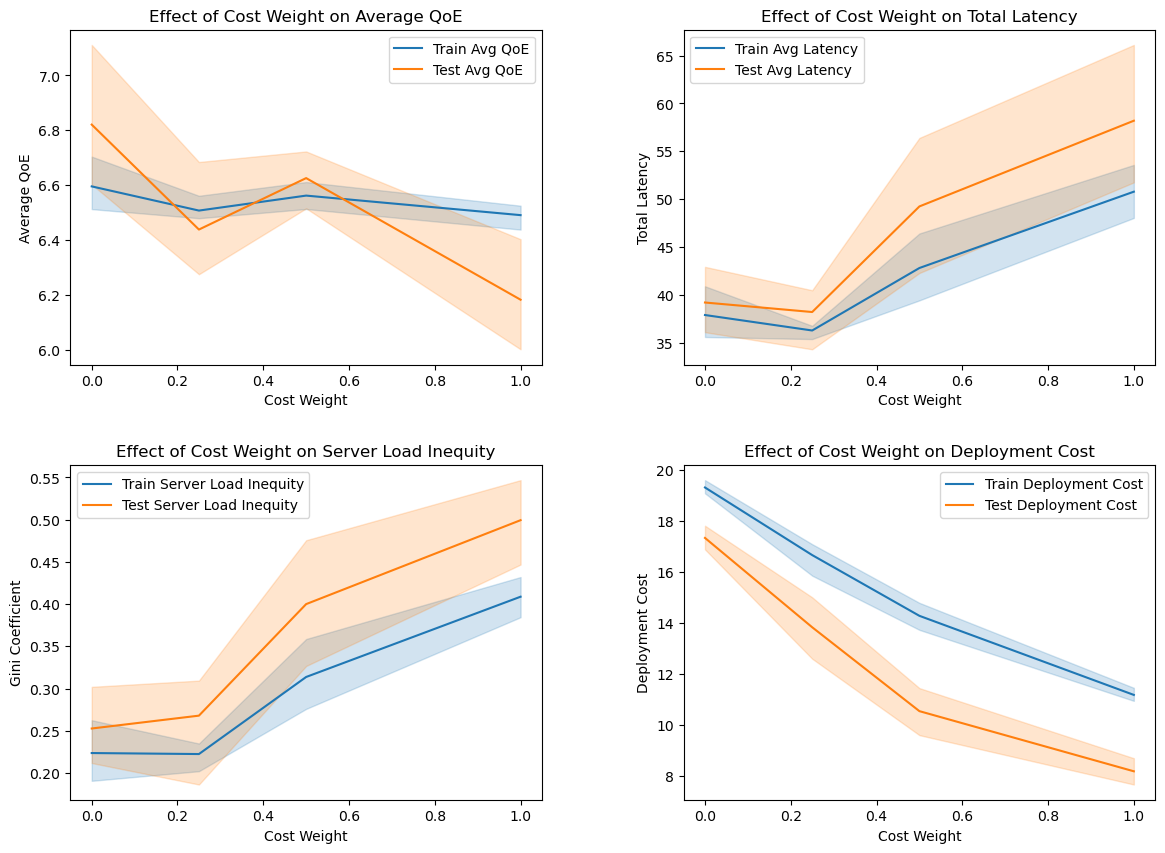

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust spacing between subplots

# Subplot 1: Train vs Test Average QoE
sns.lineplot(data=df, x='cost_weight', y='train_avg_qoe', label='Train Avg QoE', ax=axs[0, 0])
sns.lineplot(data=df, x='cost_weight', y='test_avg_qoe', label='Test Avg QoE', ax=axs[0, 0])
axs[0, 0].set_title('Effect of Cost Weight on Average QoE')
axs[0, 0].set_xlabel('Cost Weight')
axs[0, 0].set_ylabel('Average QoE')
axs[0, 0].legend()

# Subplot 2: Train vs Test Total Latency
sns.lineplot(data=df, x='cost_weight', y='train_avg_total_latency', label='Train Avg Latency', ax=axs[0, 1])
sns.lineplot(data=df, x='cost_weight', y='test_avg_total_latency', label='Test Avg Latency', ax=axs[0, 1])
axs[0, 1].set_title('Effect of Cost Weight on Total Latency')
axs[0, 1].set_xlabel('Cost Weight')
axs[0, 1].set_ylabel('Total Latency')
axs[0, 1].legend()

# Subplot 3: Train vs Test Server Load Inequity (Gini)
sns.lineplot(data=df, x='cost_weight', y='train_gini', label='Train Server Load Inequity', ax=axs[1, 0])
sns.lineplot(data=df, x='cost_weight', y='test_gini', label='Test Server Load Inequity', ax=axs[1, 0])
axs[1, 0].set_title('Effect of Cost Weight on Server Load Inequity')
axs[1, 0].set_xlabel('Cost Weight')
axs[1, 0].set_ylabel('Gini Coefficient')
axs[1, 0].legend()

# Subplot 4: Train vs Test Deployment Cost
sns.lineplot(data=df, x='cost_weight', y='train_avg_deployment_cost', label='Train Deployment Cost', ax=axs[1, 1])
sns.lineplot(data=df, x='cost_weight', y='test_avg_deployment_cost', label='Test Deployment Cost', ax=axs[1, 1])
axs[1, 1].set_title('Effect of Cost Weight on Deployment Cost')
axs[1, 1].set_xlabel('Cost Weight')
axs[1, 1].set_ylabel('Deployment Cost')
axs[1, 1].legend()

# Save the combined figure
plt.savefig('combined_cost_analysis.png')

# Show the combined figure
plt.show()


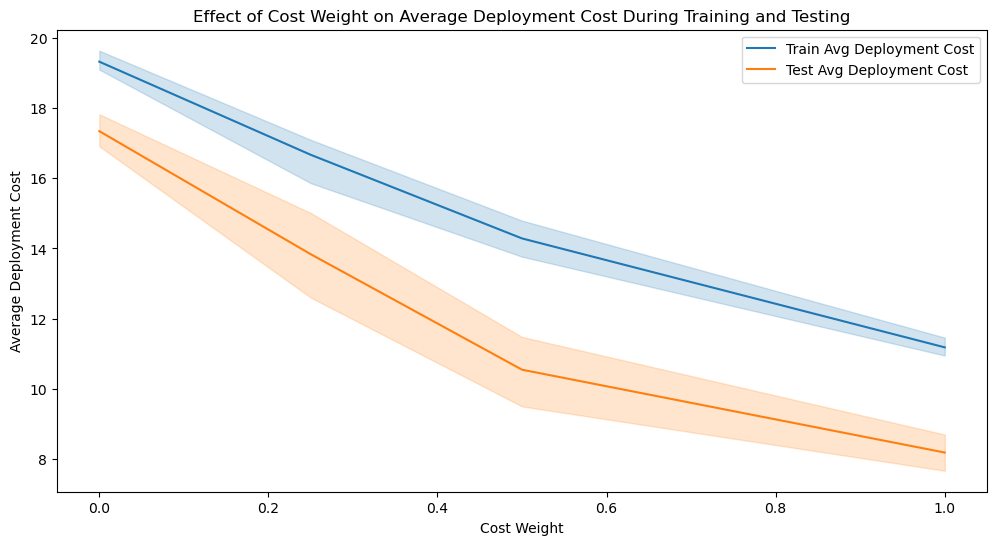

In [23]:
# Analyze the effect of 'cost_weight' on 'train_avg_deployment_cost' and 'test_avg_deployment_cost'
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='cost_weight', y='train_avg_deployment_cost', label='Train Avg Deployment Cost')
sns.lineplot(data=df, x='cost_weight', y='test_avg_deployment_cost', label='Test Avg Deployment Cost')
plt.title('Effect of Cost Weight on Average Deployment Cost During Training and Testing')
plt.xlabel('Cost Weight')
plt.ylabel('Average Deployment Cost')
plt.legend()
plt.show()

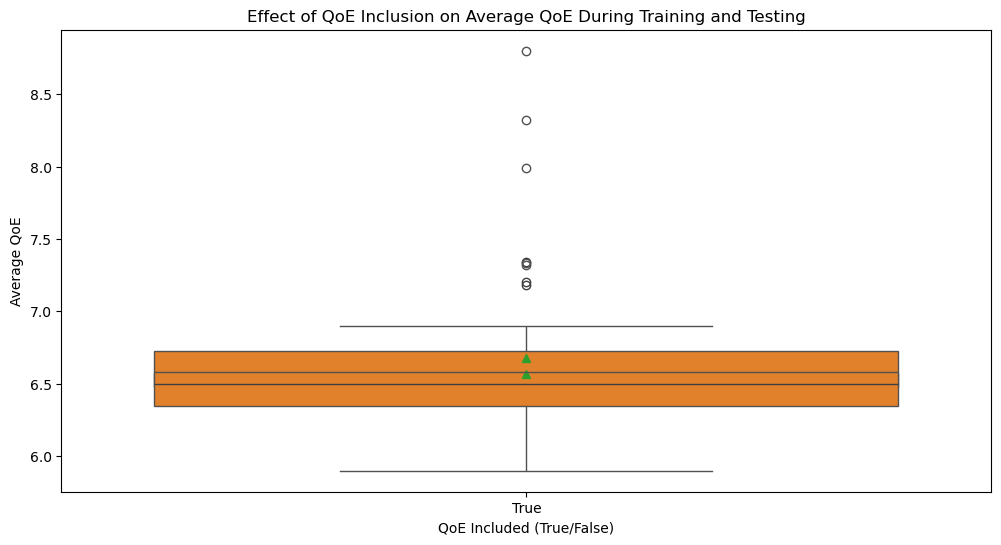

In [25]:
# Analyze the presence of 'qoe_included' on 'train_avg_qoe' and 'test_avg_qoe'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='qoe_included', y='train_avg_qoe', showmeans=True)
sns.boxplot(data=df, x='qoe_included', y='test_avg_qoe', showmeans=True)
plt.title('Effect of QoE Inclusion on Average QoE During Training and Testing')
plt.xlabel('QoE Included (True/False)')
plt.ylabel('Average QoE')
plt.show()

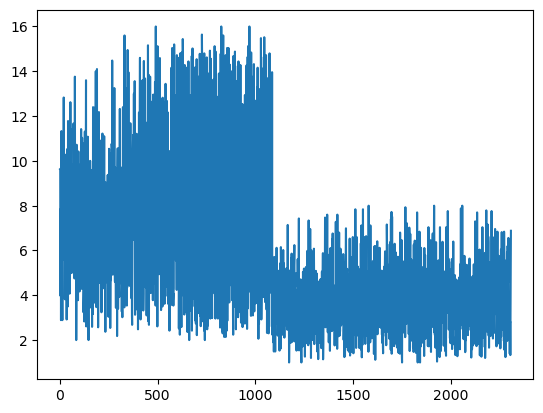

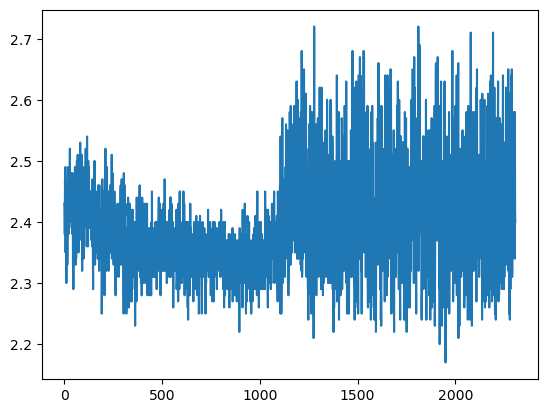

In [123]:
df = pd.read_csv('./nne_gym_results.csv', on_bad_lines='skip')


# Plot the 'reward' column
plt.plot(df['avg_deployment_cost'])
plt.show()
# Plot the 'reward' column
plt.plot(df['avg_qoe'])
plt.show()

In [9]:
variables = [
    "r", "l", "t", "reward_step", "action", "reward", "ep_block_prob", "ep_accepted_requests",
    "avg_deployment_cost", "avg_total_latency", "avg_access_latency", "avg_processing_latency",
    "avg_throuput_in", "avg_packetsize_in", "avg_interarrival_in", "avg_throuput_out",
    "avg_packetsize_out", "avg_interarrival_out", "avg_latency_binary", "avg_jerkiness_binary",
    "avg_sync_binary", "gini", "executionTime"
]
len(variables)

23

In [5]:
df

,1,0.66,0.14,86.0,7.81,22.72,6.89,15.74,0.09,74.98,29.66,2.39,0.06,32.0,24.0,30.0,0.28
0,2,9.68,0.06,94.0,6.38,23.61,6.17,17.36,0.08,73.46,28.97,3.02,0.15,41.0,33.0,20.0,0.29
1,3,-9.46,0.18,82.0,4.00,19.91,4.27,15.56,0.08,41.51,22.84,4.87,0.46,26.0,56.0,0.0,0.36
2,4,-6.55,0.16,84.0,4.42,26.60,4.17,22.36,0.07,43.07,26.30,1.94,0.53,67.0,0.0,17.0,0.36
3,5,-5.90,0.21,79.0,9.16,24.38,7.31,16.99,0.08,81.06,36.18,1.86,0.15,33.0,15.0,31.0,0.35
4,6,-1.36,0.15,85.0,1.98,24.69,2.34,22.28,0.07,66.73,31.80,2.78,0.18,20.0,43.0,22.0,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9462,2003,0.89,0.00,100.0,1.67,121478.82,1.60,121477.22,NaN,NaN,NaN,NaN,0.75,NaN,NaN,NaN,0.12
9463,2004,5.87,0.00,100.0,5.40,122811.79,4.53,122807.26,NaN,NaN,NaN,NaN,0.75,NaN,NaN,NaN,0.12
9464,2005,8.15,0.00,100.0,7.11,120443.01,6.21,120436.80,NaN,NaN,NaN,NaN,0.75,NaN,NaN,NaN,0.12
9465,2006,0.00,0.00,100.0,1.00,121803.38,1.00,121802.38,NaN,NaN,NaN,NaN,0.75,NaN,NaN,NaN,0.11
